In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mplsoccer.pitch import Pitch
import seaborn as sns

In [13]:
#Reading data
df = pd.read_csv('messibetis.csv')
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [14]:
#Multiply to match mplsoccer pitch scale
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

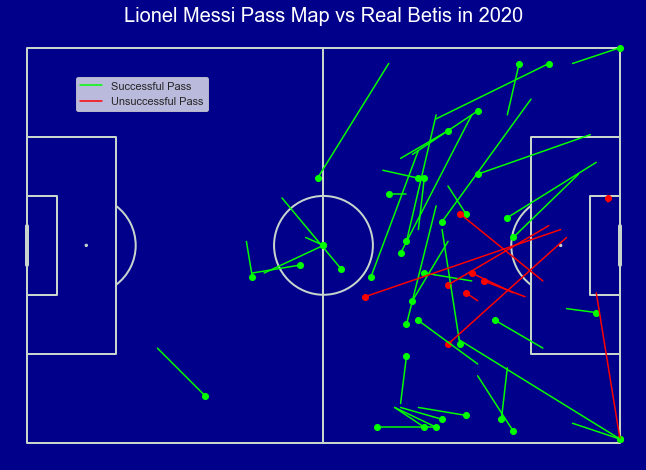

In [51]:
fig,ax = plt.subplots(figsize=(12,8))
fig.set_facecolor('#00008B')
ax.patch.set_facecolor('#00008B')
ax.grid(False)
ax.axis('off')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#00008B', line_color='#c7d5cc',figsize=(12, 9), constrained_layout=True, tight_layout=False)
pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(df['x'])):
    if df['outcome'][x] == "Successful":
        plt.plot((df['x'][x], df['endX'][x]), (df['y'][x],df['endY'][x]), color='#00FF00')
        plt.scatter(df['x'][x],df['y'][x], color = '#00FF00')
    if df['outcome'][x] == "Unsuccessful":
        plt.plot((df['x'][x], df['endX'][x]), (df['y'][x],df['endY'][x]), color='#FF0000')
        plt.scatter(df['x'][x],df['y'][x], color = '#FF0000')

success_leg = mlines.Line2D([],[], color='#00FF00', label='Successful Pass')
unsuccess_leg = mlines.Line2D([],[], color='#FF0000', label='Unsuccessful Pass')

plt.legend(handles=[success_leg, unsuccess_leg], bbox_to_anchor=(0.1,0.9), loc="upper left")
plt.title('Lionel Messi Pass Map vs Real Betis in 2020', color='white', size=20)

plt.savefig('messivsbetis_passmap.png',dpi=300,bbox_inches = 'tight')